# Python Assignment 6

⏱⏱⏱**Due: 12/01/2024 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5

In [9]:
# Load the dataset
def load_data():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    test_dataset = h5py.File('test_catvnoncat.h5', "r")

    X_train = np.array(train_dataset["train_set_x"][:])  # Training features
    Y_train = np.array(train_dataset["train_set_y"][:])  # Training labels
    X_test = np.array(test_dataset["test_set_x"][:])     # Test features
    Y_test = np.array(test_dataset["test_set_y"][:])     # Test labels

    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = load_data()

In [10]:
# PART 1 
import numpy as np
import h5py
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Load the dataset
train_dataset = h5py.File('train_catvnoncat.h5', "r")
test_dataset = h5py.File('test_catvnoncat.h5', "r")

X_train = np.array(train_dataset["train_set_x"][:])  # Training features
Y_train = np.array(train_dataset["train_set_y"][:])  # Training labels
X_test = np.array(test_dataset["test_set_x"][:])     # Test features
Y_test = np.array(test_dataset["test_set_y"][:])     # Test labels


# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Flatten and normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
Y_train = torch.tensor(Y_train, dtype=torch.float32).view(-1, 1)
Y_test = torch.tensor(Y_test, dtype=torch.float32).view(-1, 1)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)


In [11]:
# Define the neural network model
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [12]:
# Initialize the model
model = BinaryClassifier(X_train.shape[1])

# Initialize the loss function
criterion = nn.BCELoss()

# Create an optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = model(X_train)
    loss = criterion(predictions, Y_train)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

Epoch 0/1000, Loss: 0.710874080657959
Epoch 100/1000, Loss: 0.464706152677536
Epoch 200/1000, Loss: 0.29331347346305847
Epoch 300/1000, Loss: 0.2444843351840973
Epoch 400/1000, Loss: 0.223441481590271
Epoch 500/1000, Loss: 0.19651925563812256
Epoch 600/1000, Loss: 0.1869790107011795
Epoch 700/1000, Loss: 0.16974329948425293
Epoch 800/1000, Loss: 0.16019247472286224
Epoch 900/1000, Loss: 0.16047276556491852
Epoch 999/1000, Loss: 0.13682518899440765


In [14]:
# Evaluate on the test set
with torch.no_grad():
    test_predictions = model(X_test)
    test_predictions_binary = (test_predictions >= 0.5).float()

    # Calculate level of accuracy
    test_accuracy = (test_predictions_binary == Y_test).float().mean().item()
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 62.00%


Misclassified indices: [1, 3, 6, 7, 10, 11, 18, 19, 23, 25, 26, 28, 30, 38, 40, 41, 44, 46, 47]


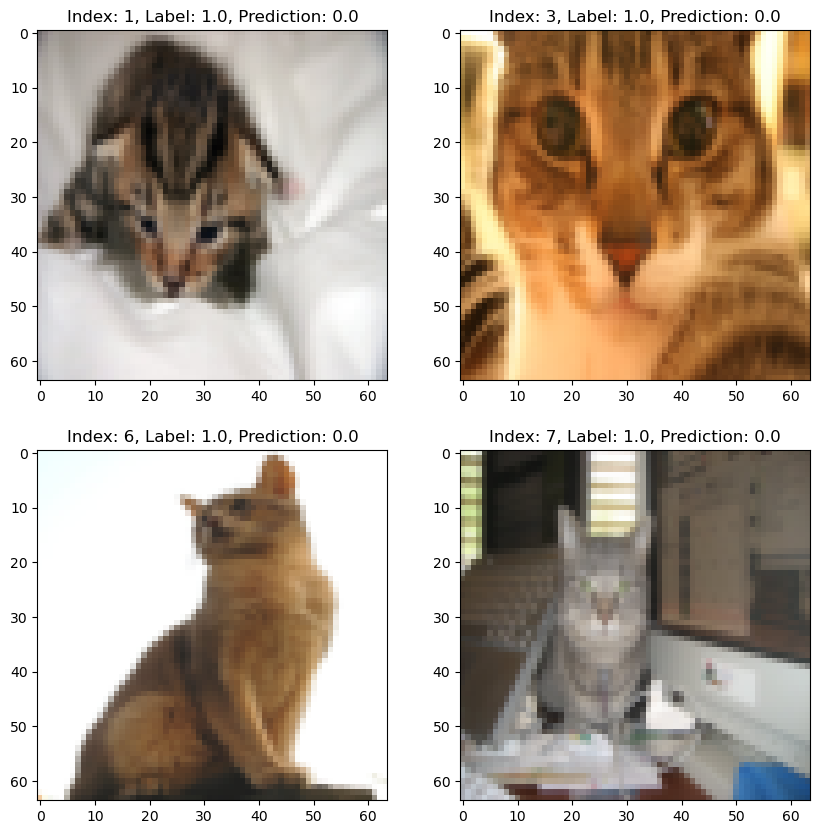

In [15]:
# Identify misclassified examples
misclassified_indices = [i for i in range(len(Y_test)) if test_predictions_binary[i] != Y_test[i]]
print("Misclassified indices:", misclassified_indices)

# Display 4 misclassified examples
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_indices[:4]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X_test[idx].reshape(64, 64, 3).numpy())
    plt.title(f"Index: {idx}, Label: {Y_test[idx].item()}, Prediction: {test_predictions_binary[idx].item()}")
plt.show()
